In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist,mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten
from keras.utils.np_utils import to_categorical

In [12]:
(X_train, y_train), (X_test, y_test) = mnist.load_data("/tmp/mnist.npz")

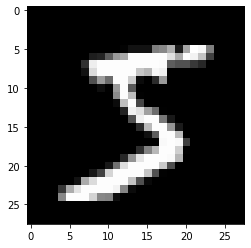

In [13]:
plt.imshow(X_train[0],cmap='gray')

In [14]:
X_train = X_train.reshape(-1, 28*28).astype('float32')/255.0
X_test = X_test.reshape(-1, 28*28).astype('float32')/255.0

In [15]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [16]:
model = Sequential([
    Dense(512, input_dim=28*28, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

h = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, validation_split=0.1,verbose=0)

0.9796018481254578 0.9787500023841857


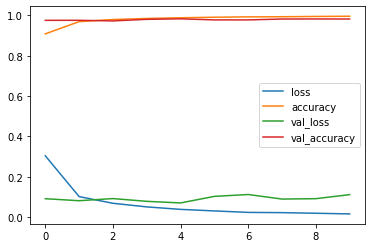

In [17]:
print(np.mean(np.array(h.history['accuracy'])),np.mean(np.array(h.history['val_accuracy'])))
pd.DataFrame(h.history).plot()

In [18]:
model.evaluate(X_test,y_test_cat)

313/313 [==============================] - 0s 2ms/step - loss: 0.0974 - accuracy: 0.9821


[0.09737121313810349, 0.9821000099182129]

In [21]:
X_train = X_train.reshape(-1, 28,28,1).astype('float32')/255.0
X_test = X_test.reshape(-1, 28,28,1).astype('float32')/255.0

In [22]:
model = Sequential([
    Conv2D(32, (3,3), input_shape=(28,28,1),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [26]:
h = model.fit(X_train, y_train_cat, batch_size=128, epochs=4, validation_split=0.3)

Epoch 1/4
329/329 [==============================] - 13s 39ms/step - loss: 0.3322 - accuracy: 0.9016 - val_loss: 0.3022 - val_accuracy: 0.9047
Epoch 2/4
329/329 [==============================] - 13s 40ms/step - loss: 0.2495 - accuracy: 0.9243 - val_loss: 0.2576 - val_accuracy: 0.9224
Epoch 3/4
329/329 [==============================] - 13s 39ms/step - loss: 0.1886 - accuracy: 0.9435 - val_loss: 0.2001 - val_accuracy: 0.9393
Epoch 4/4
329/329 [==============================] - 13s 39ms/step - loss: 0.1471 - accuracy: 0.9561 - val_loss: 0.1581 - val_accuracy: 0.9525


0.931380957365036 0.9297222197055817


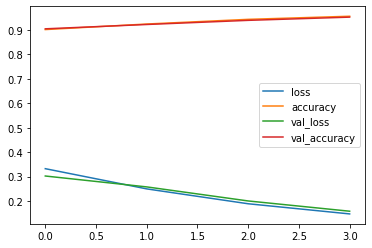

In [27]:
print(np.mean(np.array(h.history['accuracy'])),np.mean(np.array(h.history['val_accuracy'])))
pd.DataFrame(h.history).plot()

In [28]:
model.evaluate(X_test,y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.1397 - accuracy: 0.9574


[0.13966552913188934, 0.9574000239372253]